# Density of N-WASP and WAVE on lipid-coated beads

In [1]:
from bead_motility import *
wave_folder_path = '/home/jiongyi/Documents/bead_motility/2019_03_21/600_nM_arp23_200_nM_cp_5_uM_profilin_alexa_568_actin/50_nM_egfp_wave_pwca'
n_wasp_folder_path = '/home/jiongyi/Documents/bead_motility/2019_03_21/600_nM_arp23_200_nM_cp_5_uM_profilin_alexa_568_actin/50_nM_egfp_n_wasp_pwwca'

In [2]:
wave_au_row, wave_actin_au_row = batch_measure_actin_density(wave_folder_path, save_images = False)
n_wasp_au_row, n_wasp_actin_au_row = batch_measure_actin_density(n_wasp_folder_path, save_images = False)

/home/jiongyi/anaconda3/lib/python3.6/site-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/home/jiongyi/anaconda3/lib/python3.6/site-packages/skimage/measure/_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


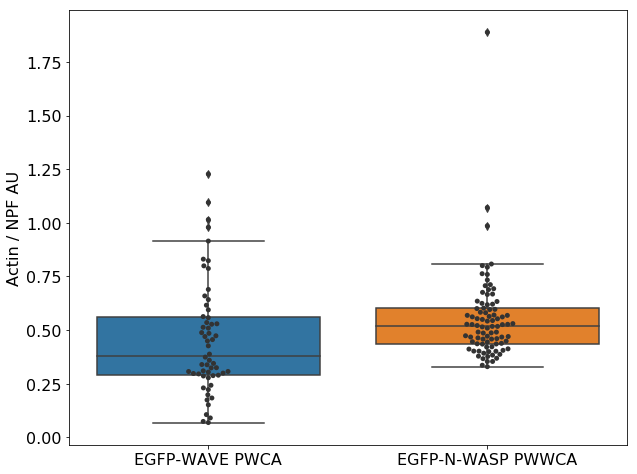

In [14]:
%matplotlib inline
from matplotlib.pyplot import figure
from seaborn import swarmplot, boxplot
from pandas import DataFrame
npf_intensity_df = DataFrame.from_dict(data = {'EGFP-WAVE PWCA': wave_actin_au_row * (2**16 - 1) / wave_au_row,
                                               'EGFP-N-WASP PWWCA': n_wasp_actin_au_row * (2**16 - 1) / n_wasp_au_row}, orient = 'index')
fig_handle = figure()
fig_handle.set_figheight(8)
fig_handle.set_figwidth(10)
box_handle = boxplot(data = npf_intensity_df.transpose())
swarm_handle = swarmplot(data = npf_intensity_df.transpose(), color = "0.2")
swarm_handle.set_ylabel('Actin / NPF AU', fontsize = 16)
swarm_handle.tick_params(labelsize=16)

Text(0.5, 0, 'EGFP-N-WASP PWWCA AU')

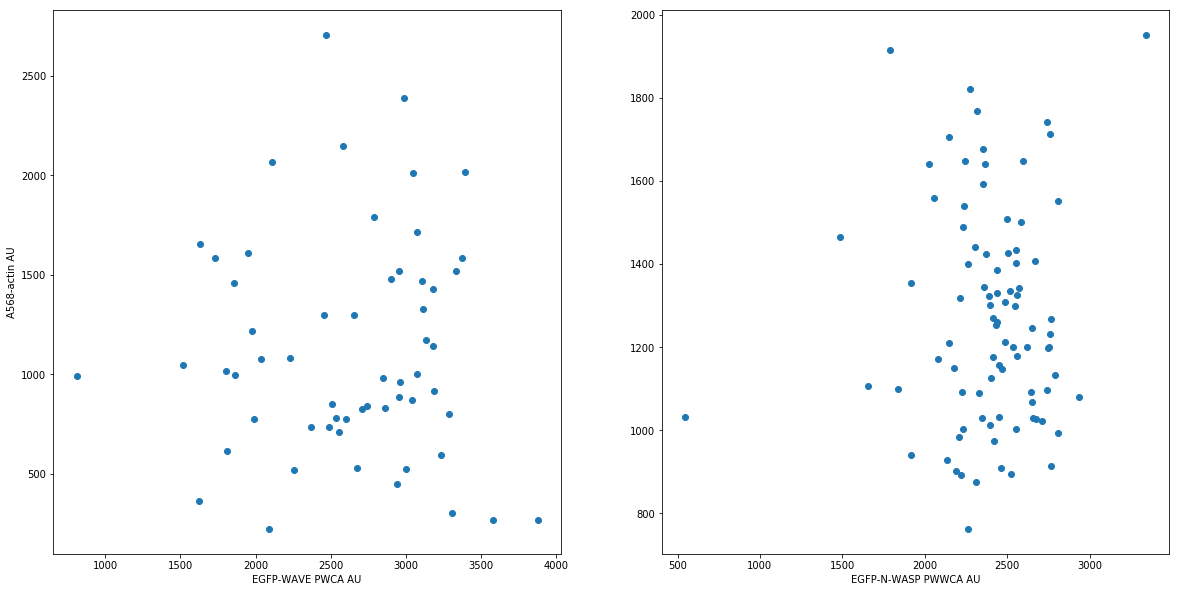

In [12]:
from matplotlib.pyplot import subplots
fig_handle, axes_handle = subplots(nrows=1, ncols=2)
fig_handle.set_figheight(10)
fig_handle.set_figwidth(20)
axes_handle[0].scatter(wave_au_row, wave_actin_au_row * (2**16 - 1))
axes_handle[0].set_xlabel('EGFP-WAVE PWCA AU')
axes_handle[0].set_ylabel('A568-actin AU')
axes_handle[1].scatter(n_wasp_au_row, n_wasp_actin_au_row * (2**16 - 1))
axes_handle[1].set_xlabel('EGFP-N-WASP PWWCA AU')